# ADS, fall 2017. Homework 3

### Q1 (10 points). P-values and hypothesis testing
Suppose that a multiple regression with 10 regressors gave the following p-values for each of them (the value below are NOT in percents yet):

0.02, 0.1, 3e-15, 0.5, 0.04, 0.001, 0.06, 0.03, 0.045, 5e-3.

For how many regressors you would reject the null-hypothesis that their corresponding regression coefficient is zero? Please explain.

### Answer
Note that the rejection (or not) of the Null Hypothesys depends on the level of significance the researcher chooses. Assuming we are working with an $\alpha= 0.05$, the regressors where we can reject the null-hypothesis that their corresponding regression coefficient is zero are 7 in total (i.e.: 0.02, 3e-15, 0.04, 0.001, 0.03, 0.045, 5e-3).

The hypothesis that their corresponding regression coefficient is zero is too unlikely and is rejected with the confidence level  95%.

### Q2 (15 points). Confidence intervals
Assume we perform a regression and get an estimate 100 for the slope coefficient for the regressor of interest. Select all statements that can not be true for its confidence intervals:

a. 99%-conficence interval is [99.99,100.01]

b. 95%-confidence interval is [-300, 300]

c. 98%-confidence interval is [95, 105], while 90%-confidence interval is [90, 110].

d. 99%-confidence interval is [99,100]

Explain your choices

### Answer
b. 95%-confidence interval is [-300, 300]
The confidence interval contains 0 inside its range. We cannot consider, with confidence level of 95%, that the slope has relevant impact in explaining the relation between x and y. As so, 100 cannot be selected as an estimate for the slope. Also, 100 is not in the middle of the interval.

c. 98%-confidence interval is [95, 105], while 90%-confidence interval is [90, 110].
The higher the confidence level, the bigger the range of the confidence interval. This case cannot be true, because the range of the 98% confidence interval is smaller than the one with 90%. 

d. 99%-confidence interval is [99,100]
The estimate has to be in the middle of the estimate. Also, it depends if the range is inclusive or not. If the range is NOT inclusive, the value of the estimate cannot be 100, in any case, it should be something smaller (e.g. 99.9999).


### Q3 (15 points). 

A linear regression model is fit over a dataset with 181 observations and 'n' features. The estimate for the regression coefficient for one of the features is 911.0964 while its standard error is 344.185.

What will be the 
a) 95, 99 and 90% confidence intervals? 
b) p-values?

### Answer
##### Assuming a t distribution:

Confidence intervals for each $\hat{w}_j$ given the confidence level $1-\alpha$ are constructred as:
$$
P\left(w_j\in[\hat{w}_j-t_{\alpha/2}\sigma\sqrt{h_j},\hat{w}_j+t_{\alpha/2}\sigma\sqrt{h_j}]\right)=1-\alpha
$$

The **two tailed** t statistics for 90%, 95% and 99% confidence and N=181 are calculated as follows:

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:


#We can obtain the two tailed critical t value for the t student distribution with df=N-1
c90=stats.t.ppf(1-(0.1/2),181-1)
c95=stats.t.ppf(1-(0.05/2),181-1)
c99=stats.t.ppf(1-(0.01/2),181-1)

print "The t statistics for N=181 are:"
print "90% confidence:",c90
print "95% confidence:",c95
print "99% confidence:",c99

wi=911.0964 #value of estimate wi
wN=181 #Number of observations
wstd=(344.185) #standard deviation of estimate w


The t statistics for N=181 are:
90% confidence: 1.6533630135
95% confidence: 1.97323082307
99% confidence: 2.60341822855


a) Confidence interval
(Assuming standard error is an estimate of a standard error of the sample)
standard error=standard deviation/(n)**0.5

In [3]:
#To obtain the confidence interval
w90=(c90*(wstd))
w95=(c95*(wstd))
w99=(c99*(wstd))


print "The 90% confidence interval is:",((wi-w90),(wi+w90)),",with range:",(wi+w90)-(wi-w90)
print "The 95% confidence interval is:",((wi-w95),(wi+w95)),",with range:",(wi+w95)-(wi-w95)
print "The 99% confidence interval is:",((wi-w99),(wi+w99)),",with range:",(wi+w99)-(wi-w99)

The 90% confidence interval is: (342.0336511997308, 1480.1591488002691) ,with range: 1138.1254976
The 95% confidence interval is: (231.9399491624614, 1590.2528508375385) ,with range: 1358.31290168
The 99% confidence interval is: (15.038897004814999, 1807.153902995185) ,with range: 1792.11500599


b) p-values?

In [4]:
##For obtaining a p-value:
t=911.0964/344.185
print "The t value is",t
p_value = stats.t.sf(np.abs(t), wN-1)
print "The two tailed p value is",round(p_value,4)
print
print "We reject at 99% confidence,","because p>",0.01/2
print "We reject at 95% confidence,","because p<",0.05/2
print "We reject at 90% confidence,","because p<",0.1/2


The t value is 2.64711245406
The two tailed p value is 0.0044

We reject at 99% confidence, because p> 0.005
We reject at 95% confidence, because p< 0.025
We reject at 90% confidence, because p< 0.05


### Q4.(ACS Data Set, 30pts)

We'll be using the ACS dataset provided below.

Survey:           ACS 2015 (5-Year Estimates)
Dataset:          Social Explorer Tables:  ACS 2015 (5-Year Estimates)

**VARIABLE DESCRIPTIONS:** (Data was collected in 2015)

Tables:

      1. Population Density (per Sq. Mile)
         Universe:  Total Population
         Name:      T2
         Variables:
            T002_001:   Total Population
            T002_002:   Population Density (Per Sq. Mile)
            T002_003:   Area (Land)


      2. Average Household Size
         Universe:  Occupied Households
         Name:      T21
         Variables:
            T021_001:   Average Household Size



      3. Median Household Income (In <DollarYear> Inflation Adjusted Dollars)
         Universe:  Households
         Name:      T57
         Variables:
            T057_001:   Median Household Income (In 2015 Inflation Adjusted Dollars)


      4. Per Capita Income (In <DollarYear> Inflation Adjusted Dollars)
         Universe:  Total Population
         Name:      T83
         Variables:
            T083_001:   Per Capita Income (In 2015 Inflation Adjusted Dollars)

 
      5. Median Gross Rent
          Universe:  Renter-occupied housing units paying cash rent
          Name:      T104
          Variables:
             T104_001:   Median Gross Rent


      6. Ratio of Income in 2015 to Poverty Level
          Universe:  Population for whom poverty status Is determined
          Name:      T117
          Variables:
             T117_001:   Population for Whom Poverty Status Is Determined:

      7. Average Commute to Work (in Min)
          Universe:  Average Commute to Work (in min)
          Name:      T147
          Variables:
             T147_001:   Average Commute to Work (in Min)


Run the regression modeling the median household income through all the features above and analyse its statistics. Based on the results, suppose X(s) is the predicted median household income for the household of the size s and if deltaX=X(s+1)-X(s) then calculate:
* (a) What's the expected price E(X)?
* (b) What's the probability that X > \$15000?  
* (c) What's the two-sided 80% confidence interval of X?
* (d) What's the one-sided 98% confidence interval of X? Calculate the upper interval $[X_0, +\infty)$,

In [5]:
df = pd.read_csv('file4.csv')
df.head()

,Unnamed: 0,Geo_FIPS,Geo_GEOID,Population_Density,Average_Household_Size,Median_Household_Income,Per_Capita_Income,Median_Value,Poverty_Status,Average_Commute_to_Work
0,2,36061000202,14000US36061000202,67374.02,2.15,29684.0,27355.0,533600.0,7768,31.0
1,4,36061000600,14000US36061000600,128089.30,2.92,19863.0,12802.0,521200.0,12378,30.0
2,5,36061000700,14000US36061000700,89695.05,1.92,117841.0,89303.0,1035900.0,8794,25.0
3,6,36061000800,14000US36061000800,112643.90,2.63,27137.0,17426.0,588100.0,9465,33.0
4,7,36061000900,14000US36061000900,12507.00,2.14,147500.0,111599.0,1000000.0,1626,26.0


In [6]:
#multilinear model
ml = smf.ols(formula='Median_Household_Income ~ Population_Density+Average_Household_Size+ \
                    Per_Capita_Income+Median_Value+Poverty_Status+Average_Commute_to_Work', data = df).fit()
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Median_Household_Income   R-squared:                       0.832
Model:                                 OLS   Adj. R-squared:                  0.827
Method:                      Least Squares   F-statistic:                     182.6
Date:                     Fri, 03 Nov 2017   Prob (F-statistic):           6.22e-83
Time:                             12:55:46   Log-Likelihood:                -2585.8
No. Observations:                      229   AIC:                             5186.
Df Residuals:                          222   BIC:                             5210.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.535e+04   1.24e+04      1.234      0.219   -9165.448    3.99e+04
Population_Density          0.0318      0.041      0.768      0.443      -0.050       0.113
Average_Household_Size   1.121e+04   4621.474      2.426      0.016    2104.409    2.03e+04
Per_Capita_Income           0.9073      0.049     18.392      0.000       0.810       1.005
Median_Value                0.0043      0.004      1.085      0.279      -0.004       0.012
Poverty_Status             -0.8155      0.603     -1.353      0.177      -2.003       0.372
Average_Commute_to_Work  -612.3823    324.227     -1.889      0.060   -1251.338      26.574
==============================================================================
Omnibus:                       34.484   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.301
Skew:                           0.678   Prob(JB):                     4.95e-19
Kurtosis:                       5.645   Cond. No.                     9.98e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that in the summary, **Population_Density** is not significant and its confidence iterval contains 0. Same happens for **Median_Value** and **Poverty_Status** and **Average_Commute_to_Work**. This features are candidates for discard in a feature selection based on p-values. However, as there are multiple features, this could be a consquence of colinearity between them.

The R square, on the other hand, has a decent value.

'''
#Run the regression modeling the median household income through all the features above and analyse its statistics. 
#Based on the results, suppose X(s) is the predicted median household income for the household of the size s and if deltaX=X(s+1)-X(s) then calculate:

* (a) What's the expected price E(X)?

* (b) What's the probability that X > \$15000? 

* (c) What's the two-sided 80% confidence interval of X?

* (d) What's the one-sided 98% confidence interval of X? Calculate the upper interval $[X_0, +\infty)$,'''


In [25]:
#since we are only using household size, we need the value of that parameter to construct the prediction
#parameter for household size:
ml.params[2]

11211.981640017435

In [31]:
#the predicted values based on household size would be
pred_s=ml.params[2]*df.Average_Household_Size+ml.params[0] #this would be X(s)
pred_s_plus=ml.params[2]*(df.Average_Household_Size+1)+ml.params[0] #this would be X(s)+1

In [36]:
#the expected price of deltaX would be:
(pred_s_plus-pred_s).mean()

11211.981640017435

which is equal to the slope for the household size

In [38]:
cost=15e3
prob_great=len(pred_s[pred_s>cost])*1.0/len(pred_s)
print "The probability that X >",cost,"is",round(prob_great,3)


The probability that X > 15000.0 is 1.0


Since the intercept is already higher than 15000 and none of the negative regressors are significant, all of the values predicted by the model are higher than 15000

In [11]:
#calculating two sided confidence interval for 80% confidence for X(s)
c80=stats.t.ppf(1-(0.2/2),229-1)
w80=(c80*(pred_s.std()))/(229**0.5)
print "Confidence Interval:",(pred_s.mean()-w80,pred_s.mean()+w80)
print "range is",(pred_s.mean()+w80)-(pred_s.mean()-w80)

Confidence Interval: (38070.114642014814, 38848.287423212765)
range is 778.172781198


In [42]:
#calculating one sided UPPER confidence interval for 98% confidence for X(s)
c98=stats.t.ppf(1-(0.02/2),229-1)
w98=(c98*(pred_s.std()))/(229**0.5)

print "Upper Confidence Interval:",float("-infinity"),",",(pred_s.mean()+w98)
print "Lower Confidence Interval:",(pred_s.mean()-w98),",",float("-infinity")


Upper Confidence Interval: -inf , 39168.4318185
Lower Confidence Interval: 37749.9702468 , -inf


#### We can compare that to the model including all the variables.

In [13]:
pred=ml.predict()

In [14]:
print "Expected Value is",round(pred.mean(),3)

Expected Value is 92247.847


In [15]:
cost=15e3
prob_great=len(pred[pred>cost])*1.0/len(pred)
print "The probability that X >",cost,"is",round(prob_great,3)


The probability that X > 15000.0 is 1.0


In [16]:
c80=stats.t.ppf(1-(0.2/2),229-1)
w80=(c80*(pred.std()))/(229**0.5)

In [41]:
print (pred.mean()-w80,pred.mean()+w80)


(88588.058478218809, 95907.635844925404)


In [18]:
c98=stats.t.ppf(1-(0.02/2),229-1)
w98=(c98*(pred.std()))/(229**0.5)

print "Upper Confidence Interval:",float("-infinity"),",",(pred_s.mean()+w98)


Upper Confidence Interval: -inf , 45130.3025326


### Q5 (30 points). Data visualization using PCA
We'll be using the breast cancer dataset from sklearn for this problem.

a) For the given labeled data perform PCA and visualize (using bar-plot) the fraction of variance explained by each principle components.

b) Visualize the observations along the first two principle components with colors depending on the label.

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
X, y = load_breast_cancer(return_X_y=True)

In [20]:
print X.shape, len(y)

(569L, 30L) 569


In [21]:
data_i=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data_i.shape

(569, 31)

In [22]:
data_i.corr()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
1,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
2,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
3,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
4,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
5,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
6,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
7,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
8,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
9,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


[  9.82044672e-01   1.61764899e-02   1.55751075e-03   1.20931964e-04
   8.82724536e-05   6.64883951e-06   4.01713682e-06   8.22017197e-07
   3.44135279e-07   1.86018721e-07   6.99473205e-08   1.65908880e-08
   6.99641650e-09   4.78318306e-09   2.93549214e-09   1.41684927e-09
   8.29577731e-10   5.20405883e-10   4.08463983e-10   3.63313378e-10
   1.72849737e-10   1.27487508e-10   7.72682973e-11   6.28357718e-11
   3.57302295e-11   2.76396041e-11   8.14452259e-12   6.30211541e-12
   4.43666945e-12   1.55344680e-12]


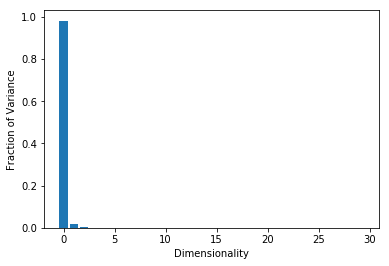

In [23]:
n=30 # how many eigenvectors we choose
pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_ratio_
print pca.explained_variance_ratio_
plt.bar(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Fraction of Variance")
plt.show();

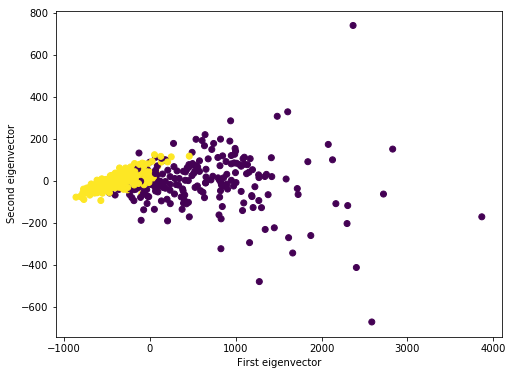

In [24]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y)
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.show()